In [15]:
# Project1
#The technical requirements for Project 1 are as follows.
# Use Pandas to clean and format your data set(s)
# Create a Jupyter Notebook describing the data exploration and cleanup process
# Create a Jupyter Notebook illustrating the final data analysis
# Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)
# Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation
# Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions
# Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

#Create Dependencies
import pandas as pd
import pprint as pprint
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [16]:
#    Read in DataFrame
CombinedWorld_df = pd.read_csv("World_Development_indicators.csv")
#         Life Expectancy and Infant Mortality 
CombinedWorld_df.head()

,Unnamed: 0,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,...,2010_Imports,2011_Imports,2012_Imports,2013_Imports,2014_Imports,2015_Imports,2016_Imports,2017_Imports,2018_Imports,2019_Imports
0,0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,1.854190e+09,2.136313e+09,2.089385e+09,2.130726e+09,2.113408e+09,2.035754e+09,1.975419e+09,2.031844e+09,NaN,NaN
1,1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,...,9.950050e+09,1.190656e+10,1.252506e+10,1.133990e+10,1.053200e+10,8.647160e+09,8.079197e+09,9.153344e+09,NaN,NaN
2,2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,3.568226e+10,4.394739e+10,4.591971e+10,4.930420e+10,5.047164e+10,3.849951e+10,2.552939e+10,2.839711e+10,NaN,NaN
3,3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,5.792202e+09,6.700290e+09,5.860856e+09,5.999409e+09,6.243051e+09,5.071012e+09,5.436291e+09,6.070288e+09,6.856193e+09,NaN
4,4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#•	Create Life Expectancy Scatter Plot comparing life expectancy vs. countries together based on GDP per capita.

In [18]:
#           o	One for earliest common year (i.e. 1990)
# 1990
# Apply Mask to Handle NaN Data    --this function is needed because all columns contain some NULLS and so we need filter
#                                      that will still allow us to analyze the data that we do have...
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(CombinedWorld_df['1990_GDP_Cap']) & ~np.isnan(CombinedWorld_df['1990_Life'])
# Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(CombinedWorld_df['1990_GDP_Cap'][mask], CombinedWorld_df['1990_Life'][mask])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_1990 = slope * CombinedWorld_df['1990_GDP_Cap'] + intercept
# Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.0007186253368693696 Intercept=61.05577241738026 Rvalue=0.5991782943664243 Pvalue=3.807473466019661e-22 Stderr=6.610423510363478e-05


The R-squared value is 0.6.


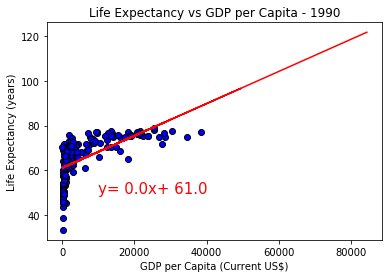

In [19]:
#  Plot the Life Expectancy vs GDP per Capita Data
plt.scatter(CombinedWorld_df['1990_GDP_Cap'], CombinedWorld_df['1990_Life'], c = "blue", edgecolors = "black")
# Plot the Regress Values
plt.plot(CombinedWorld_df['1990_GDP_Cap'], regress_1990, c = "red")
# Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (10000, 50), fontsize = 15, color = "red")
# Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life Expectancy (years)")
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the Plot as a PNG
plt.savefig("tve-Life_Expectancy_vs_GDP_per_Capita_1990.png")
# Show the Plot
plt.show()


In [20]:
#                 o	One for latest common year (i.e. 2017)
# 2017
# Apply Mask to Handle NaN Data    --this function is needed because all columns contain some NULLS and so we need filter
#                                      that will still allow us to analyze the data that we do have...
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(CombinedWorld_df['2017_GDP_Cap']) & ~np.isnan(CombinedWorld_df['2017_Life'])
# Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(CombinedWorld_df['2017_GDP_Cap'][mask], CombinedWorld_df['2017_Life'][mask])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_2017 = slope * CombinedWorld_df['2017_GDP_Cap'] + intercept
# Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.00026898600507103363 Intercept=68.54854163326159 Rvalue=0.6671896866217961 Pvalue=2.218800529652529e-31 Stderr=1.9759013872650582e-05


The Rsquared value is 0.67.


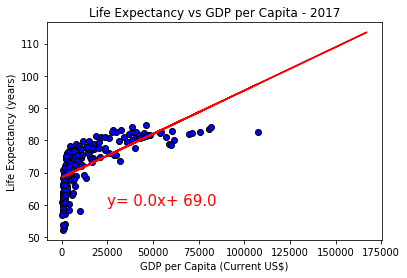

In [21]:
#       Plot the Life Expectancy vs GDP per Capita Data
plt.scatter(CombinedWorld_df['2017_GDP_Cap'], CombinedWorld_df['2017_Life'], c = "blue", edgecolors = "black")
# Plot the Regress Values
plt.plot(CombinedWorld_df['2017_GDP_Cap'], regress_2017, c = "red")
# Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (25000, 60), fontsize = 15, color = "red")
# Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life Expectancy (years)")
# Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
# Save the Plot as a PNG
plt.savefig("tve-Life_Expectancy_vs_GDP_per_Capita_2017")
# Show the Plot
plt.show()

In [22]:
# •	Create Infant Mortality Rate Scatter Plot comparing life expectancy vs. countries together based on GDP per capita.

In [23]:
#              o	One for earliest common year (i.e. 1990)
# 1990
# Apply Mask to Handle NaN Data    --this function is needed because all columns contain some NULLS and so we need filter
#                                      that will still allow us to analyze the data that we do have...
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(CombinedWorld_df['1990_GDP_Cap']) & ~np.isnan(CombinedWorld_df['1990_Mortality'])
# Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(CombinedWorld_df['1990_GDP_Cap'][mask], CombinedWorld_df['1990_Mortality'][mask])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_1990 = slope * CombinedWorld_df['1990_GDP_Cap'] + intercept
# Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=-0.0020522271501450646 Intercept=61.40712269196005 Rvalue=-0.5210673450476626 Pvalue=3.7367069204492447e-16 Stderr=0.00023197082686758264


The R-squared value is -0.52.


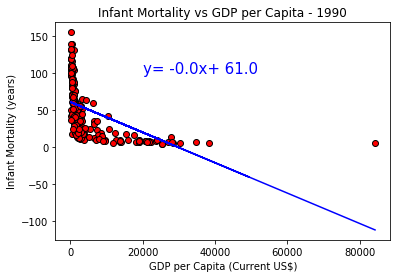

In [24]:
#         o	One for earliest common year (i.e. 1990)
# Plot the Export vs GDP per Capita Data
plt.scatter(CombinedWorld_df['1990_GDP_Cap'], CombinedWorld_df['1990_Mortality'], c = "red", edgecolors = "black")
# Plot the Regress Values
plt.plot(CombinedWorld_df['1990_GDP_Cap'], regress_1990, c = "blue")
# Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (20000, 100), fontsize = 15, color = "blue")
# Create the Labels
plt.title("Infant Mortality vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality (years)")
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the Plot as a PNG
plt.savefig("tve-Infant_Mortality_vs_GDP_per_Capita_1990")
# Show the Plot
plt.show()

In [25]:
#         o	One for latest common year (i.e. 2017)

# 2017
# Apply Mask to Handle NaN Data    --this function is needed because all columns contain some NULLS and so we need filter
#                                      that will still allow us to analyze the data that we do have...
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(CombinedWorld_df['2017_GDP_Cap']) & ~np.isnan(CombinedWorld_df['2017_Mortality'])
# Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(CombinedWorld_df['2017_GDP_Cap'][mask], CombinedWorld_df['2017_Mortality'][mask])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_2017 = slope * CombinedWorld_df['2017_GDP_Cap'] + intercept
# Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=-0.0004932151681831907 Intercept=29.429089195085986 Rvalue=-0.5099264199038944 Pvalue=6.843367427435614e-17 Stderr=5.4625252219127846e-05


The R-squared value is -0.51.


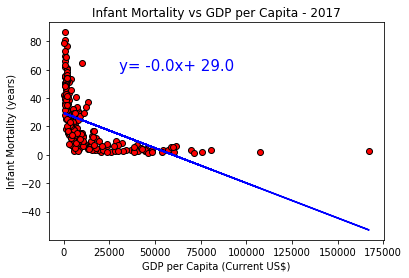

In [26]:
#         Plot the Export vs GDP per Capita Data
plt.scatter(CombinedWorld_df['2017_GDP_Cap'], CombinedWorld_df['2017_Mortality'], c = "red", edgecolors = "black")
# Plot the Regress Values
plt.plot(CombinedWorld_df['2017_GDP_Cap'], regress_2017, c = "blue")
# Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (30000, 60), fontsize = 15, color = "blue")
# Create the Labels
plt.title("Infant Mortality vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality (years)")
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the Plot as a PNG
plt.savefig("tve-Infant_Mortality_vs_GDP_per_Capita_2017")
# Show the Plot
plt.show()

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


The Rsquared value is: 0.6858127612102306.
The Residual Sum of Squares is: 6859.438489211701  The Total Sum of Squares is: 21832.326849536767.


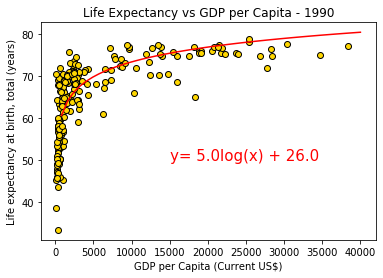

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log


The R-squared value is: 0.7419545644249947.
The Residual Sum of Squares is: 3430.3044797499747  The Total Sum of Squares is: 13293.412736040817.


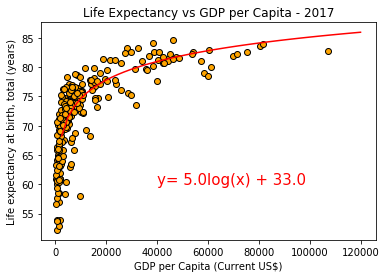

In [29]:
#            ----------------what if we could use non-linear regression techniques ??? --------------
# Create a Scatter Plot of Life Expectancy vs GDP per Capita

#           1990
# Found Data for Logarithmic Regression at 
#               https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#           and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Assign Values to xData and yData
xdata = CombinedWorld_df['1990_GDP_Cap']
ydata = CombinedWorld_df['1990_Life']

# logarithmic function
def LogFunc(x, p1,p2):
  return p1*np.log(x)+p2

# Apply Mask to Handle NaN Data
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
# Curve Definition
popt, pcov = curve_fit(LogFunc, xdata[mask], ydata[mask])

# Curve params
p1 = popt[0]
p2 = popt[1]

# Create the Line Equation
log_eq_1990 = "y= " + str(round(p1,0)) + "log(x) + " + str(round(p2,0))
# Plot the Life Expectancy vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "gold", edgecolors = "black")
# Create the Predicted Values
curvex = np.linspace(0,40000,50)
curvey = LogFunc(curvex,p1,p2)

# Non-Linear Regression "Curve" Method found at 
#                https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
# Calculate the Residuals
residuals = ydata - LogFunc(xdata, p1, p2)
# Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
# Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
# Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

# Plot the Regress Values
plt.plot(curvex, curvey, 'r')
# Annotate the Line Equation
plt.annotate(log_eq_1990, xy = (15000, 50), fontsize = 15, color = "red")
# Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
# Display the R squared Value
print(f"The Rsquared value is: {r_squared}.")
print(f"The Residual Sum of Squares is: {ss_res}  The Total Sum of Squares is: {ss_tot}.")
# Save the Plot as a PNG
plt.savefig("tve-Life_Expectancy_vs_GDP_per_Capita_1990-Curve.png")
# Show the Plot
plt.show()


#             2017
# Found Data for Logarithmic Regression at 
#              https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#          and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Assign Values to xData and yData
xdata = CombinedWorld_df['2017_GDP_Cap']
ydata = CombinedWorld_df['2017_Life']

# logarithmic function
def LogFunc(x, p1,p2):
  return p1*np.log(x)+p2

# Apply Mask to Handle NaN Data
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
# Curve Definition
popt, pcov = curve_fit(LogFunc, xdata[mask], ydata[mask])

# Curve params
p1 = popt[0]
p2 = popt[1]

# Create the Line Equation
log_eq_2017 = "y= " + str(round(p1,0)) + "log(x) + " + str(round(p2,0))
# Plot the Life Expectancy vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "orange", edgecolors = "black")
# Create the Predicted Values
curvex = np.linspace(0,120000,50)
curvey = LogFunc(curvex,p1,p2)

# Non-Linear Regression "Curve" Method found at 
#                https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
# Calculate the Residuals
residuals = ydata - LogFunc(xdata, p1, p2)
# Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
# Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
# Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)         

# Plot the Regress Values
plt.plot(curvex, curvey, 'r')
# Annotate the Line Equation
plt.annotate(log_eq_2017, xy = (40000, 60), fontsize = 15, color = "red")
# Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
# Display the R squared Value
print(f"The R-squared value is: {r_squared}.")
print(f"The Residual Sum of Squares is: {ss_res}  The Total Sum of Squares is: {ss_tot}.")
# Save the Plot as a PNG
plt.savefig("tve-Life_Expectancy_vs_GDP_per_Capita_2017-Curve.png")
# Show the Plot
plt.show()

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':


The R-squared value is: 0.73.
The Residual Sum of Squares is: 98151.37789394014  The Total Sum of Squares is: 363811.798767644.


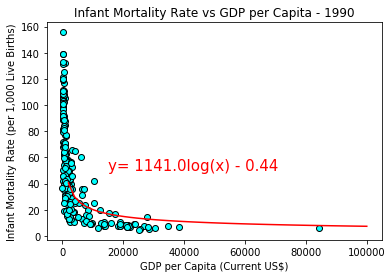

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in power


The R-squared value is: 0.66.
The Residual Sum of Squares is: 31256.164849066066  The Total Sum of Squares is: 91277.70385551079.


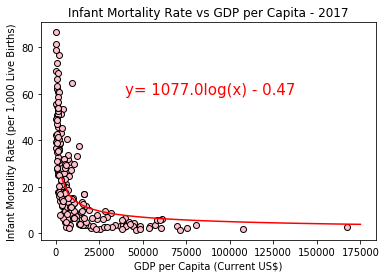

In [30]:
# Create a Scatter Plot of Infant Mortality Rate vs GDP per Capita

#     1990
# Found Data for Logarithmic Regression at https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
# and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Assign Values to xData and yData
xdata = CombinedWorld_df['1990_GDP_Cap']
ydata = CombinedWorld_df['1990_Mortality']

# logarithmic function
def LogFunc(x, p1, p2):
  return p1*x**-p2

# Apply Mask to Handle NaN Data
# Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
# Curve Definition
popt, pcov = curve_fit(LogFunc, xdata[mask], ydata[mask])

# Curve params
p1 = popt[0]
p2 = popt[1]

# Create the Line Equation
log_eq_1990 = "y= " + str(round(p1,0)) + "log(x) - " + str(round(p2,2))
# Plot the Infant Mortality vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "cyan", edgecolors = "black")
# Create the Predicted Values
curvex=np.linspace(0,100000,50)
curvey=LogFunc(curvex,p1,p2)

#     Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
# Calculate the Residuals
residuals = ydata - LogFunc(xdata, p1, p2)
# Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
# Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
# Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

# Plot the Regress Values
plt.plot(curvex, curvey, 'r')
# Annotate the Line Equation
plt.annotate(log_eq_1990, xy = (15000, 50), fontsize = 15, color = "red")
# Create the Labels
plt.title("Infant Mortality Rate vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality Rate (per 1,000 Live Births)")
# Display the R squared Value
print(f"The R-squared value is: {round(r_squared, 2)}.")
print(f"The Residual Sum of Squares is: {ss_res}  The Total Sum of Squares is: {ss_tot}.")
# Save the Plot as a PNG
plt.savefig("tve-Infant_Mortality_vs_GDP_per_Capita_1990-Curve.png")
# Show the Plot
plt.show()



#          2017
# Found Data for Logarithmic Regression at 
#                  https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#              and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Assign Values to xData and yData
xdata = CombinedWorld_df['2017_GDP_Cap']
ydata = CombinedWorld_df['2017_Mortality']

# logarithmic function
def LogFunc(x, p1,p2):
  return p1*x**-p2

# Apply Mask to Handle NaN Data
#       Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
# Curve Definition
popt, pcov = curve_fit(LogFunc, xdata[mask], ydata[mask])

# Curve params
p1 = popt[0]
p2 = popt[1]

# Create the Line Equation
log_eq_2017 = "y= " + str(round(p1,0)) + "log(x) - " + str(round(p2,2))
# Plot the Infant Mortality vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "pink", edgecolors = "black")
# Create the Predicted Values
curvex=np.linspace(0,175000,50)
curvey=LogFunc(curvex,p1,p2)

#       Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
# Calculate the Residuals
residuals = ydata - LogFunc(xdata, p1, p2)
# Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
# Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
# Calculate the R-squared Value
r_squared = 1 -(ss_res/ss_tot)

# Plot the Regress Values
plt.plot(curvex, curvey, 'r')
# Annotate the Line Equation
plt.annotate(log_eq_2017, xy = (40000, 60), fontsize = 15, color = "red")
# Create the Labels
plt.title("Infant Mortality Rate vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality Rate (per 1,000 Live Births)")
# Display the R squared Value
print(f"The R-squared value is: {round(r_squared, 2)}.")
print(f"The Residual Sum of Squares is: {ss_res}  The Total Sum of Squares is: {ss_tot}.")
# Save the Plot as a PNG
plt.savefig("tve-Infant_Mortality_vs_GDP_per_Capita_2017-Curve.png")
# Show the Plot
plt.show()